In [1]:
#!kaggle competitions download -c playground-series-s4e9

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [3]:
train_df = pd.read_csv("playground-series-s4e9/train.csv")
test_df = pd.read_csv("playground-series-s4e9/test.csv")

In [4]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
train_df.tail()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900
188532,188532,Porsche,Macan Base,2016,59500,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,28995


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,188533.0,94266.000000,54424.933488,0.0,47133.0,94266.0,141399.0,188532.0
model_year,188533.0,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
price,188533.0,43878.016178,78819.522254,2000.0,17000.0,30825.0,49900.0,2954083.0


In [8]:
train_df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [9]:
train_df.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

In [10]:
train_df = train_df[~train_df['fuel_type'].isin(['–', 'not supported'])]

train_df.reset_index(drop=True, inplace=True)

In [11]:
train_df.fuel_type.value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
Plug-In Hybrid       521
Name: count, dtype: int64

In [12]:
# Flex pattern
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("Flex", case=False, na=False)), 'fuel_type'] = 'E85 Flex Fuel'

# Hybried patterns
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("Dual", case=False, na=False)), 'fuel_type'] = 'Hybrid'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("Electric", case=False, na=False)), 'fuel_type'] = 'Hybrid'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("Battery", case=False, na=False)), 'fuel_type'] = 'Hybrid'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("kW", case=False, na=False)), 'fuel_type'] = 'Hybrid'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("AH", case=False, na=False)), 'fuel_type'] = 'Hybrid'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['brand'].str.contains("Tesla", case=False, na=False)), 'fuel_type'] = 'Hybrid'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['model'].str.contains("Hybrid", case=False, na=False)), 'fuel_type'] = 'Hybrid'


# Gasoline patterns
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("GDI", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("PDI", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("OHV", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("MPFI", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("TFSI", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("DOHC", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("Gasoline", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['model_year'] < 2020), 'fuel_type'] = 'Gasoline'

# Diesel patterns
train_df.loc[(train_df['fuel_type'].isna()) & (train_df['engine'].str.contains("Diesel", case=False, na=False)), 'fuel_type'] = 'Diesel'

In [13]:
train_df['fuel_type'] = train_df['fuel_type'].fillna('Hybrid')

In [14]:
train_df[train_df['clean_title'].isna() & train_df['accident'] == 'At least 1 accident or damage reported']

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


In [19]:
train_df.loc[(train_df['accident'] == 'At least 1 accident or damage reported') & (train_df['clean_title'].isna()), 'clean_title'] = 'Yes'

In [21]:
train_df['clean_title'].isna().sum()

20239

In [22]:
train_df['clean_title'] = train_df['clean_title'].fillna('No')

In [23]:
train_df['accident'] = train_df['accident'].fillna('None reported')

In [24]:
train_df["price"].min()

2000

In [25]:
train_df["price"].max()

2954083

In [26]:
train_df[train_df["price"]>=2954083][["brand","price","milage","model_year"]].head()

,brand,price,milage,model_year
220,Ford,2954083,26315,2021
1874,Chrysler,2954083,55900,2003
13794,Toyota,2954083,85000,2014
14645,Hyundai,2954083,13865,2022
15981,Mercedes-Benz,2954083,34068,2005


In [28]:
train_df[(train_df['price']<= 1500000) & (train_df['price']>=700000 )][['brand','price','model_year']].head(10)

,brand,price,model_year
5693,Audi,749950,2019
8567,Lamborghini,749950,2020
17606,Lamborghini,749950,2021
18646,Porsche,749950,2021
21659,Mercedes-Benz,749950,2023
34211,Chevrolet,749950,2023
37295,Bentley,749950,2022
41707,Bentley,749950,2020
48925,Ford,749950,2021
59431,Mercedes-Benz,749950,2018


<Axes: xlabel='milage', ylabel='price'>

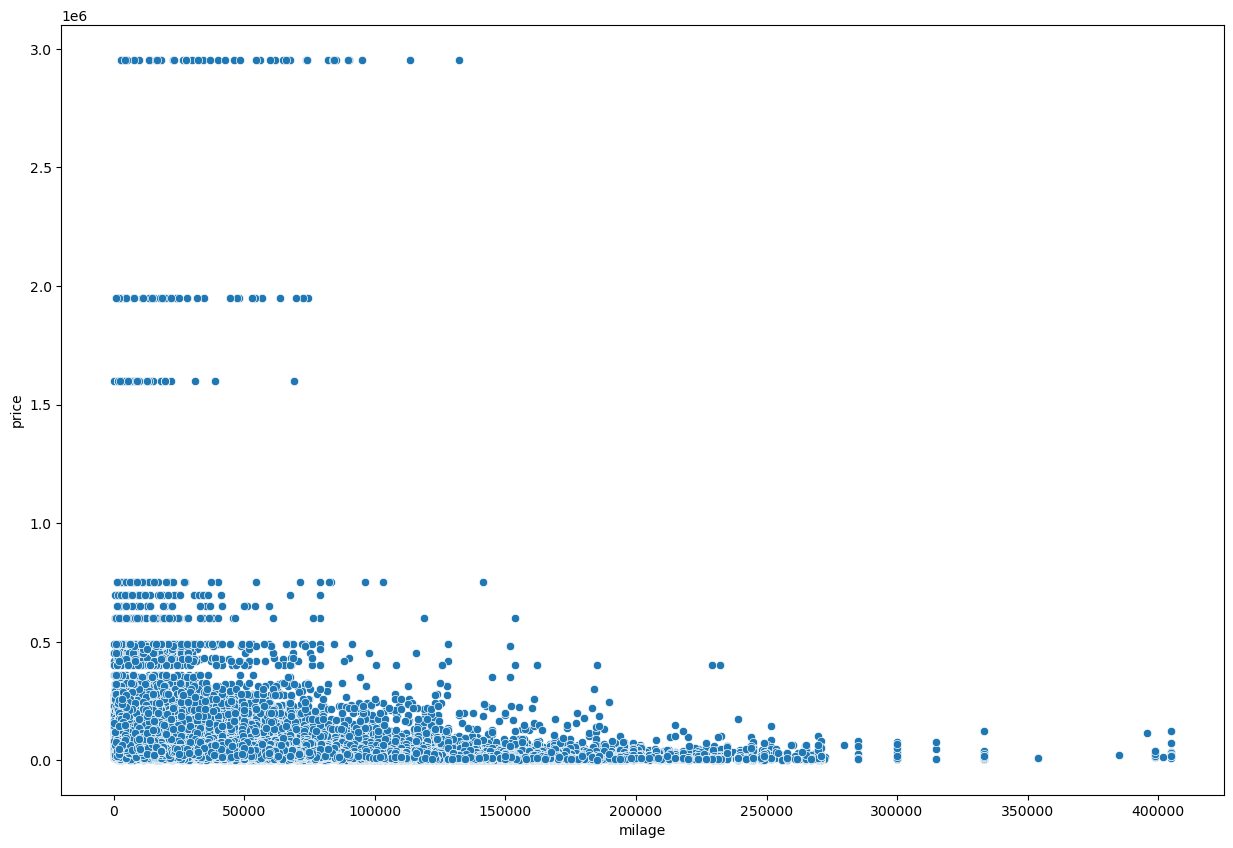

In [27]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=train_df, x='milage', y='price')

In [29]:
train_df = train_df[train_df['price'] <= 749950]

<Axes: xlabel='milage', ylabel='price'>

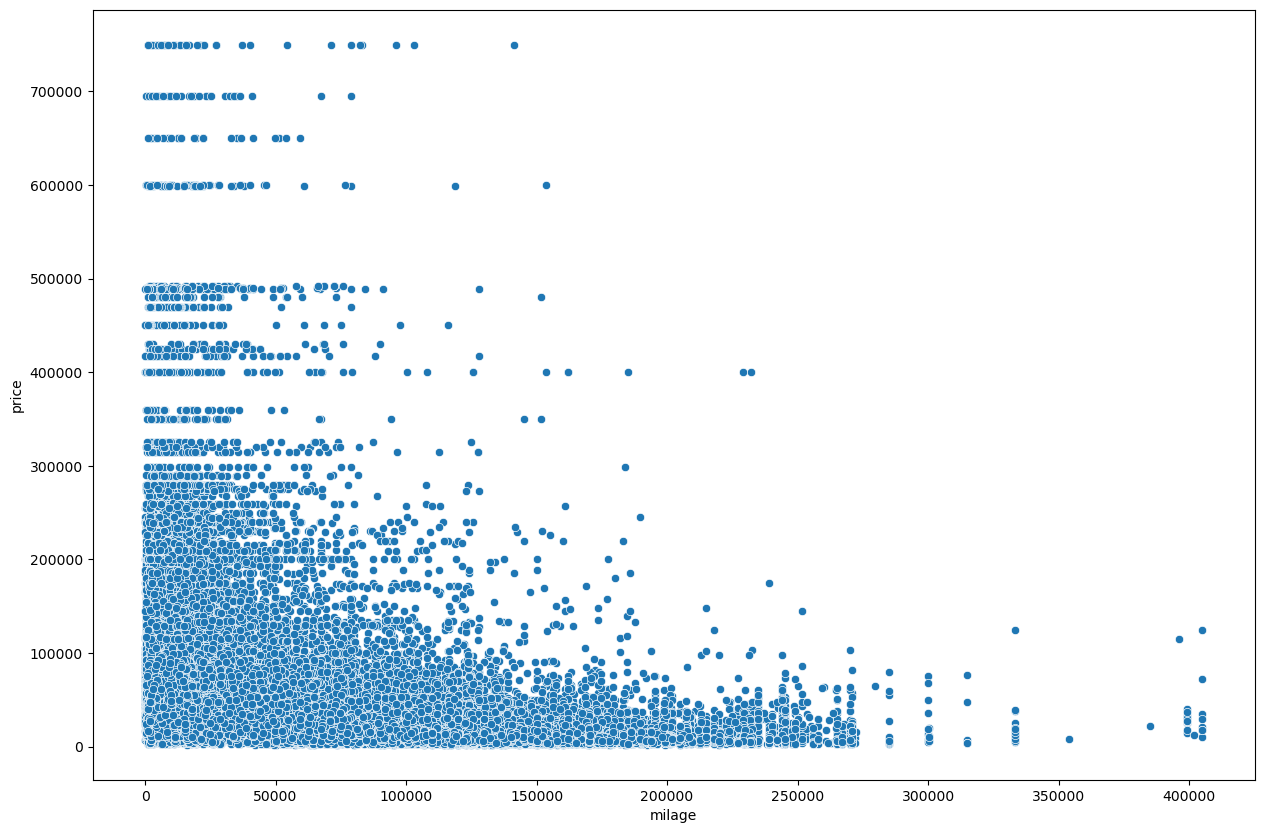

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=train_df, x='milage', y='price')

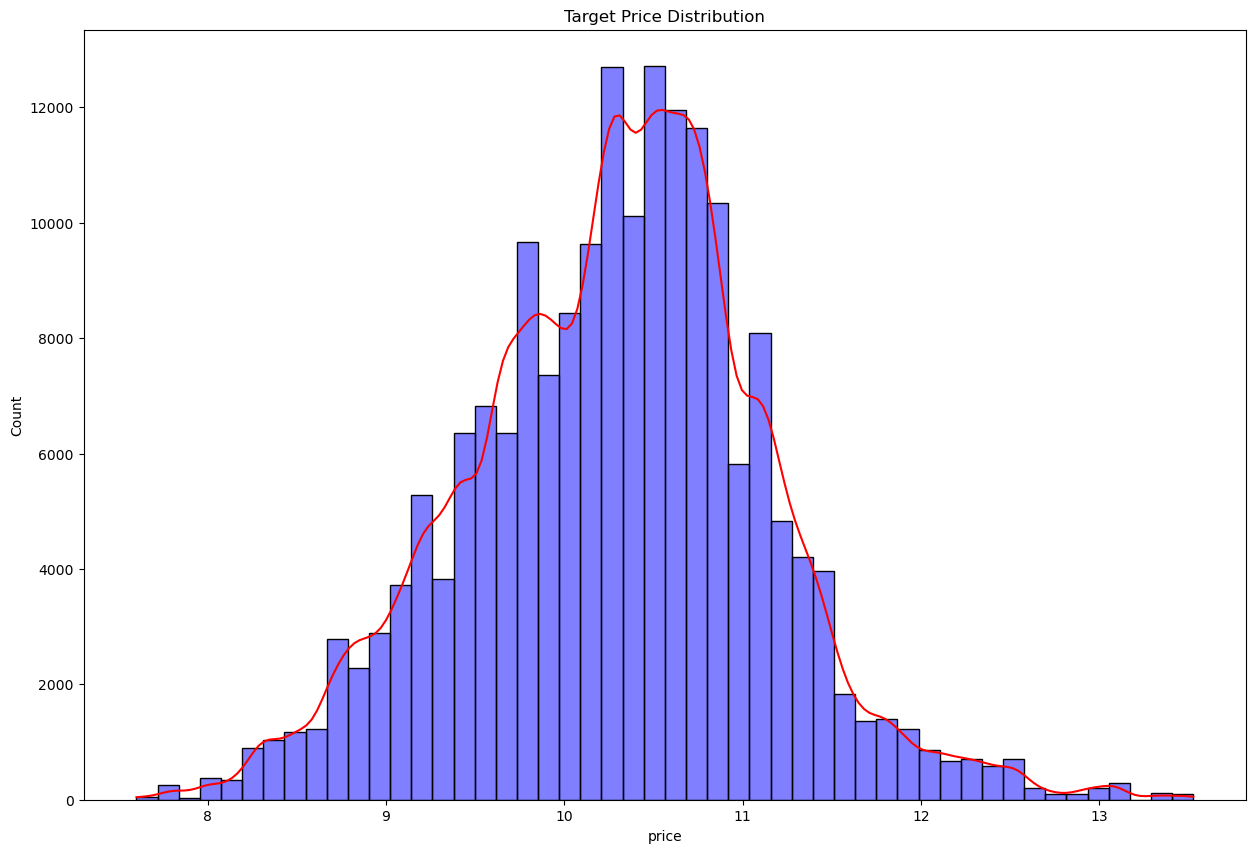

In [31]:
plt.figure(figsize=(15,10))
sns.histplot(
    x = np.log(train_df['price']),
    stat='count',  
    kde= True, 
    bins = 50,
    color="blue",
).lines[0].set_color("red")

plt.title('Target Price Distribution')
plt.show()

<Axes: xlabel='model_year', ylabel='price'>

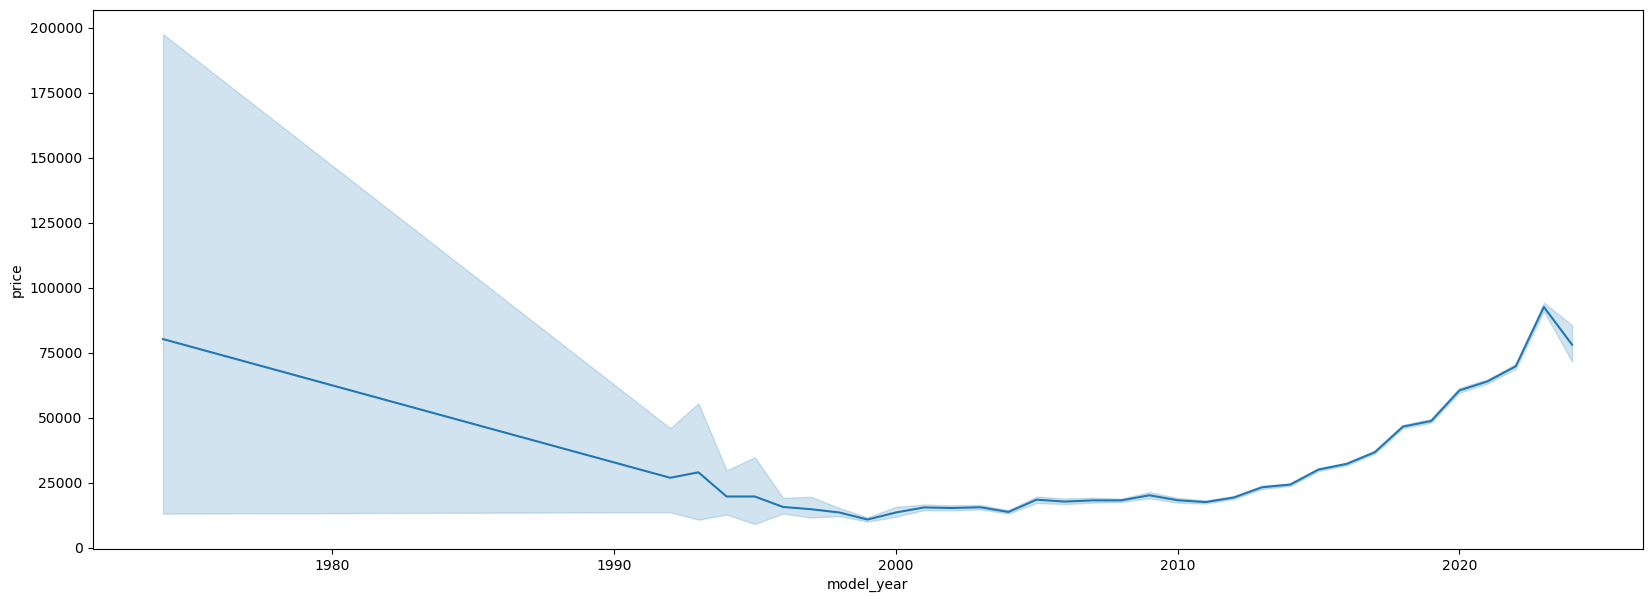

In [32]:
plt.figure(figsize=(20,7))
sns.lineplot(data = train_df, x="model_year", y="price",  markers=True)

Text(0.5, 1.0, 'Model Year Distribution (Count Plot)')

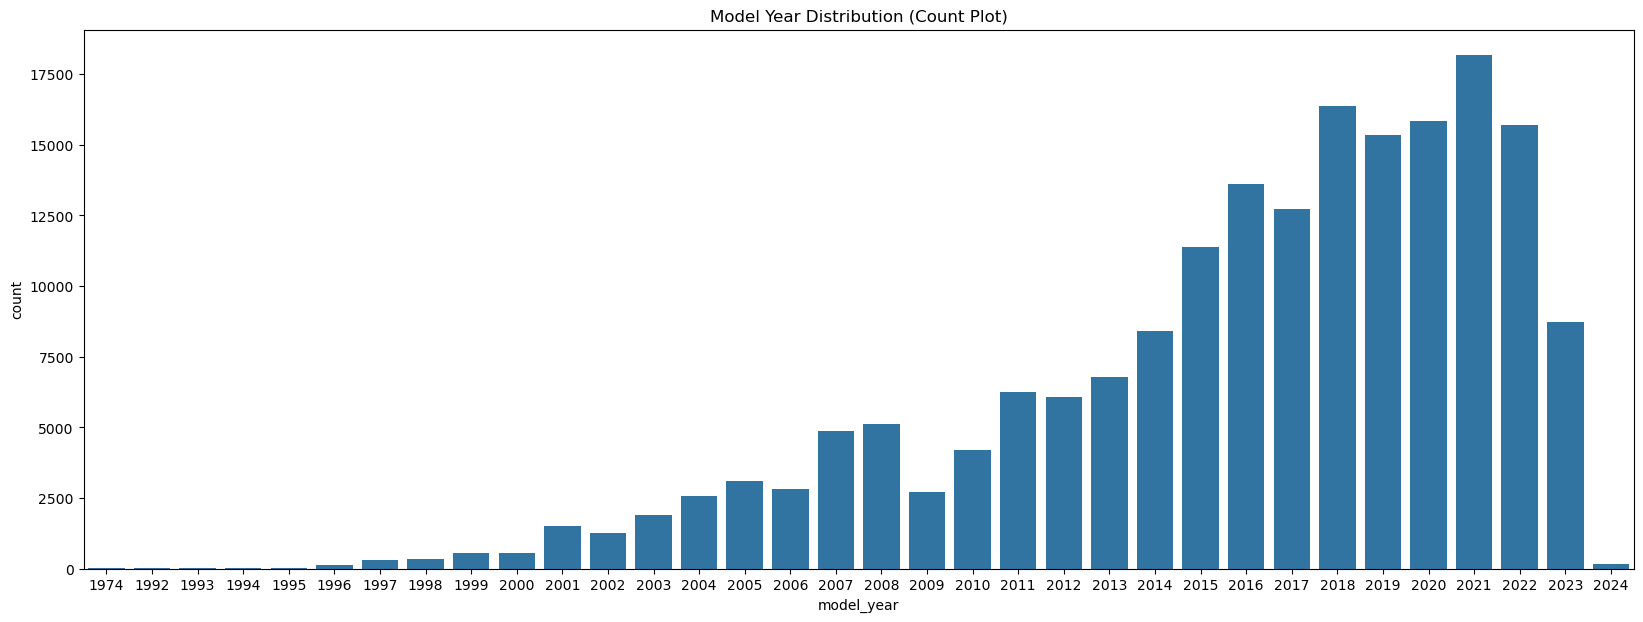

In [33]:
plt.figure(figsize=(20,7))
sns.countplot(data=train_df, x='model_year')
plt.title('Model Year Distribution (Count Plot)')

In [36]:
current_year = datetime.now().year

train_df['car_age'] = current_year - train_df['model_year']



def categorize_age(car_age):
    if car_age <= 5:
        return 'New'
    elif 6 <= car_age <= 20:
        return 'Middle-aged'
    else:
        return 'Old'

train_df['age_group'] = train_df['car_age'].apply(categorize_age)

C:\Users\BAHA ENES\AppData\Local\Temp\ipykernel_21548\3538260875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['car_age'] = current_year - train_df['model_year']
C:\Users\BAHA ENES\AppData\Local\Temp\ipykernel_21548\3538260875.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['age_group'] = train_df['car_age'].apply(categorize_age)


In [37]:
train_df['age_group'].value_counts()

age_group
Middle-aged    106936
New             73989
Old              6666
Name: count, dtype: int64

In [38]:
brand_groups = train_df.groupby('brand')['id'].count().sort_values(ascending=False).reset_index()
brand_groups.columns = ['Brand Name', 'Count']

brand_groups

,Brand Name,Count
0,Ford,22961
1,Mercedes-Benz,19141
2,BMW,17018
3,Chevrolet,16273
4,Audi,10882
5,Porsche,10536
6,Land,9510
7,Toyota,8789
8,Lexus,8634
9,Jeep,6454


In [39]:
top_brands = train_df['brand'].value_counts().head(10).index

df_top_brands = train_df[train_df['brand'].isin(top_brands)]

summary_stats = df_top_brands.groupby('brand')['price'].agg(['mean', 'median', 'min', 'max']).reset_index()
summary_stats.columns = ['Brand', 'Mean Price', 'Median Price', 'Min Price', 'Max Price']

summary_stats

,Brand,Mean Price,Median Price,Min Price,Max Price
0,Audi,40455.235251,29900.0,2000,749950
1,BMW,42957.631449,31000.0,2000,749950
2,Chevrolet,40461.407546,32000.0,2000,749950
3,Ford,38833.106616,32000.0,2000,749950
4,Jeep,34174.301673,29342.5,2000,749950
5,Land,50878.766246,38995.0,2000,749950
6,Lexus,33048.239518,25500.0,2000,649999
7,Mercedes-Benz,49558.957473,36570.0,2000,749950
8,Porsche,66437.755220,45858.0,2000,749950
9,Toyota,28485.399590,22000.0,2000,695000


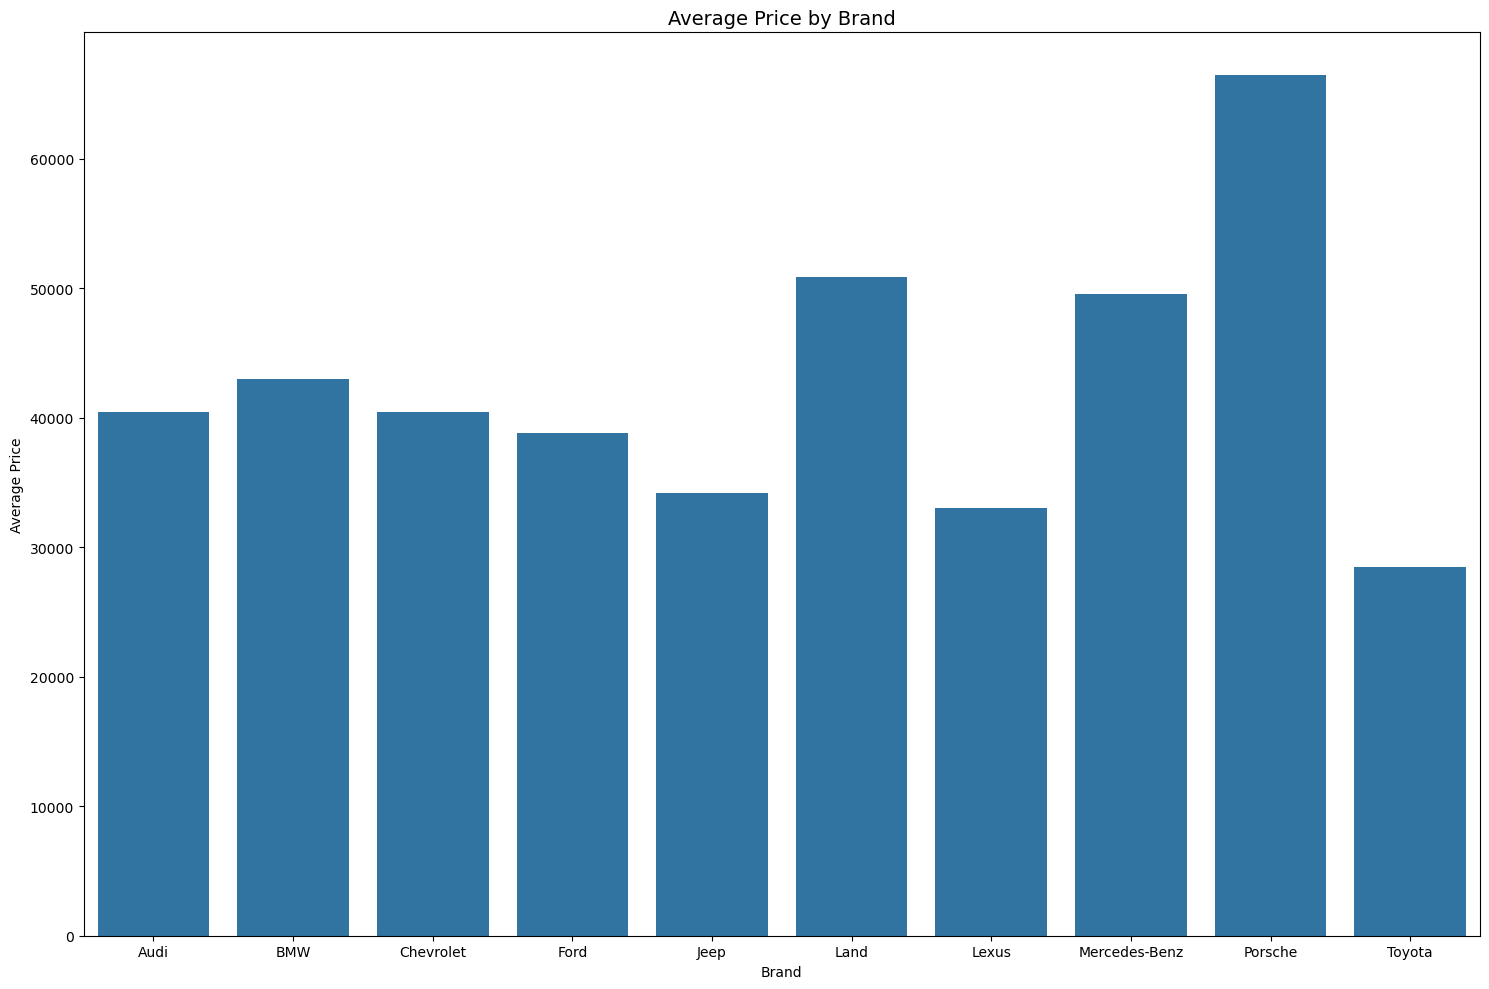

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(data=summary_stats, x='Brand', y='Mean Price', estimator='mean')

plt.title('Average Price by Brand', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

In [41]:
luxurious_brands = [
    'Bentley', 'Porsche', 'Rolls-Royce', 'Jaguar', 'Ferrari', 
    'Lamborghini', 'Maserati', 'Bugatti', 'Aston', 'Maybach'
]

In [42]:
train_df['brand_type'] = train_df['brand'].apply(lambda x: 'luxurious' if x in luxurious_brands else 'normal')

C:\Users\BAHA ENES\AppData\Local\Temp\ipykernel_21548\782675292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['brand_type'] = train_df['brand'].apply(lambda x: 'luxurious' if x in luxurious_brands else 'normal')


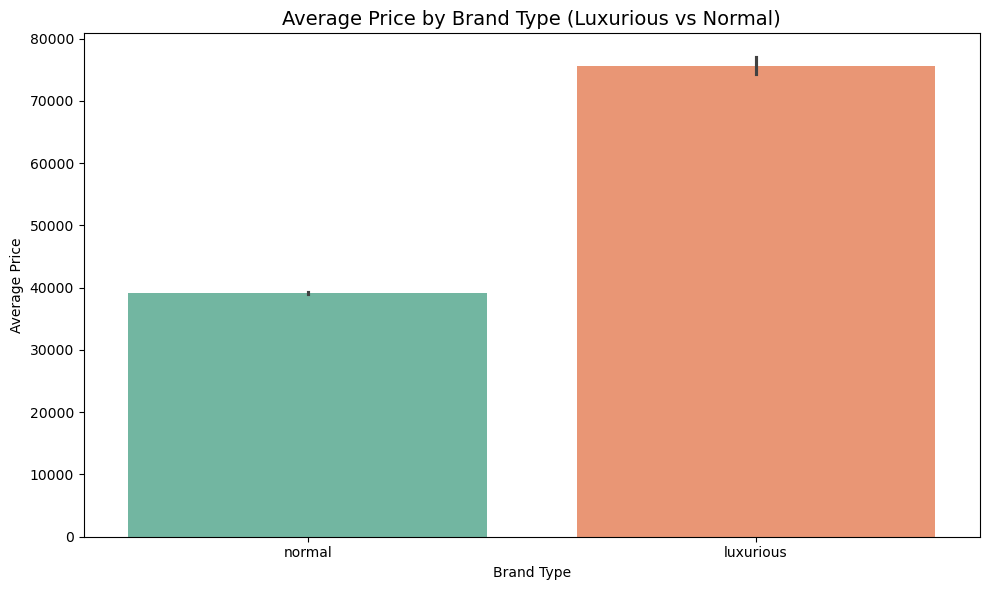

In [43]:
plt.figure(figsize=(10, 6))

sns.barplot(data=train_df, x='brand_type', y='price', hue='brand_type', estimator='mean', palette='Set2')

plt.title('Average Price by Brand Type (Luxurious vs Normal)', fontsize=14)
plt.xlabel('Brand Type')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

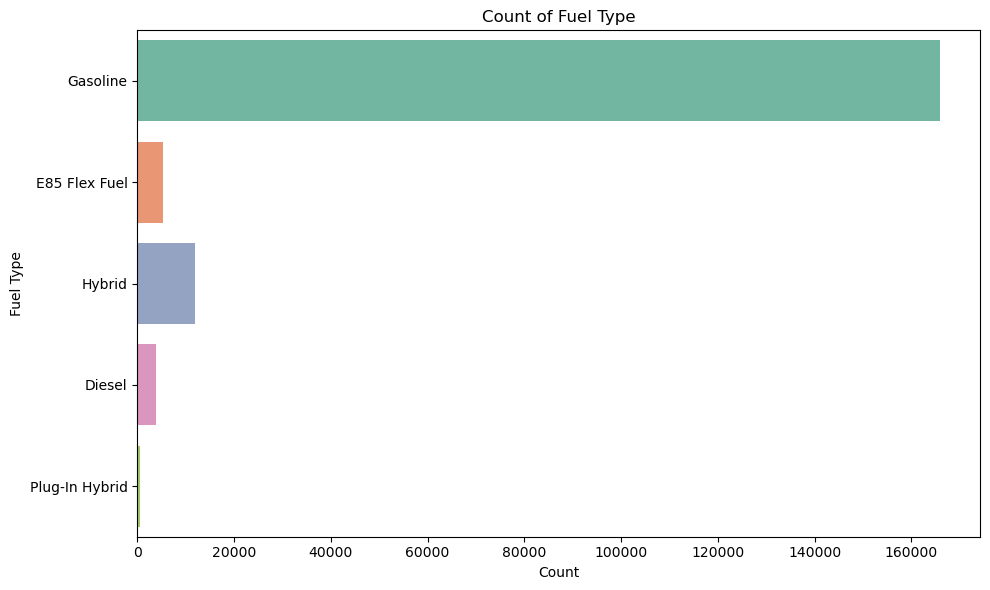

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, y='fuel_type', hue='fuel_type', palette="Set2")
plt.title('Count of Fuel Type')
plt.ylabel('Fuel Type')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [46]:
train_df['ext_col'].value_counts()

ext_col
Black                                 48513
White                                 43580
Gray                                  25162
Silver                                16907
Blue                                  14467
                                      ...  
GT SILVER                                 5
Granite Crystal Metallic Clearcoat        5
Blue Caelum                               4
BLUE                                      3
Mango Tango Pearlcoat                     2
Name: count, Length: 319, dtype: int64

In [47]:
top_10_colors = train_df['ext_col'].value_counts().head(10).index

df_colors = train_df[train_df['ext_col'].isin(top_10_colors)]

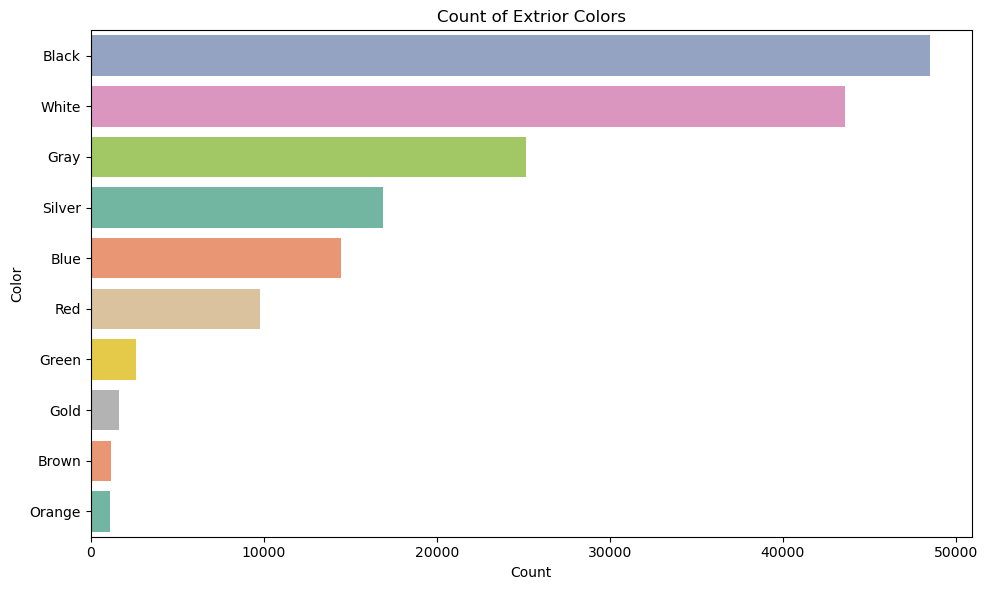

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_colors, y='ext_col', hue='ext_col', palette="Set2", order=df_colors['ext_col'].value_counts().index)
plt.title('Count of Extrior Colors')
plt.ylabel('Color')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

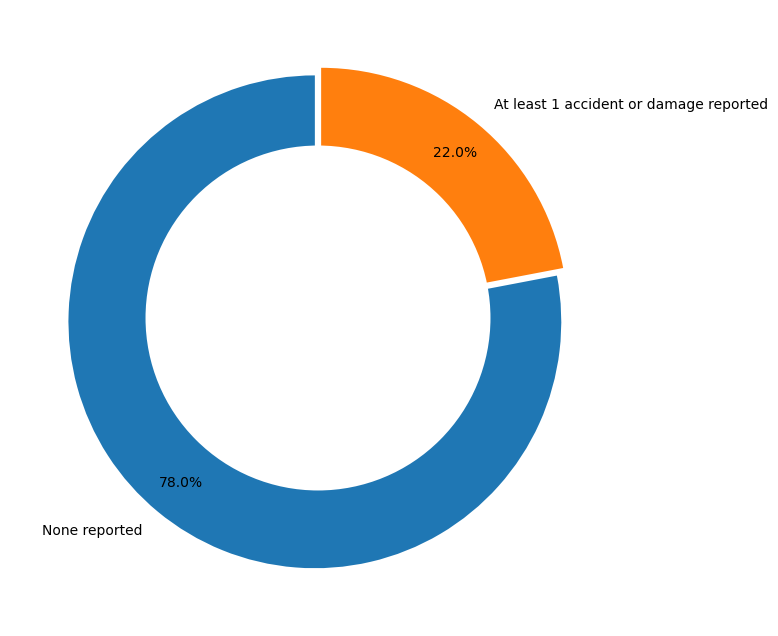

In [49]:
accident_history = train_df['accident'].value_counts()

accident_labels = accident_history.index
accident_value = accident_history

plt.figure(figsize=(10, 8))
explode = np.full(len(accident_labels), 0.02)
plt.pie(accident_value, labels=accident_labels, autopct='%1.1f%%', startangle=90, explode = explode, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [50]:
train_df['transmission'].value_counts()

transmission
A/T                                                   49496
8-Speed A/T                                           20610
Transmission w/Dual Shift Mode                        19198
6-Speed A/T                                           18019
6-Speed M/T                                           11881
7-Speed A/T                                           11110
Automatic                                             10682
8-Speed Automatic                                      8412
10-Speed A/T                                           8032
9-Speed A/T                                            3856
5-Speed A/T                                            3181
10-Speed Automatic                                     3156
6-Speed Automatic                                      2796
4-Speed A/T                                            2479
5-Speed M/T                                            2341
9-Speed Automatic                                      2321
CVT Transmission           

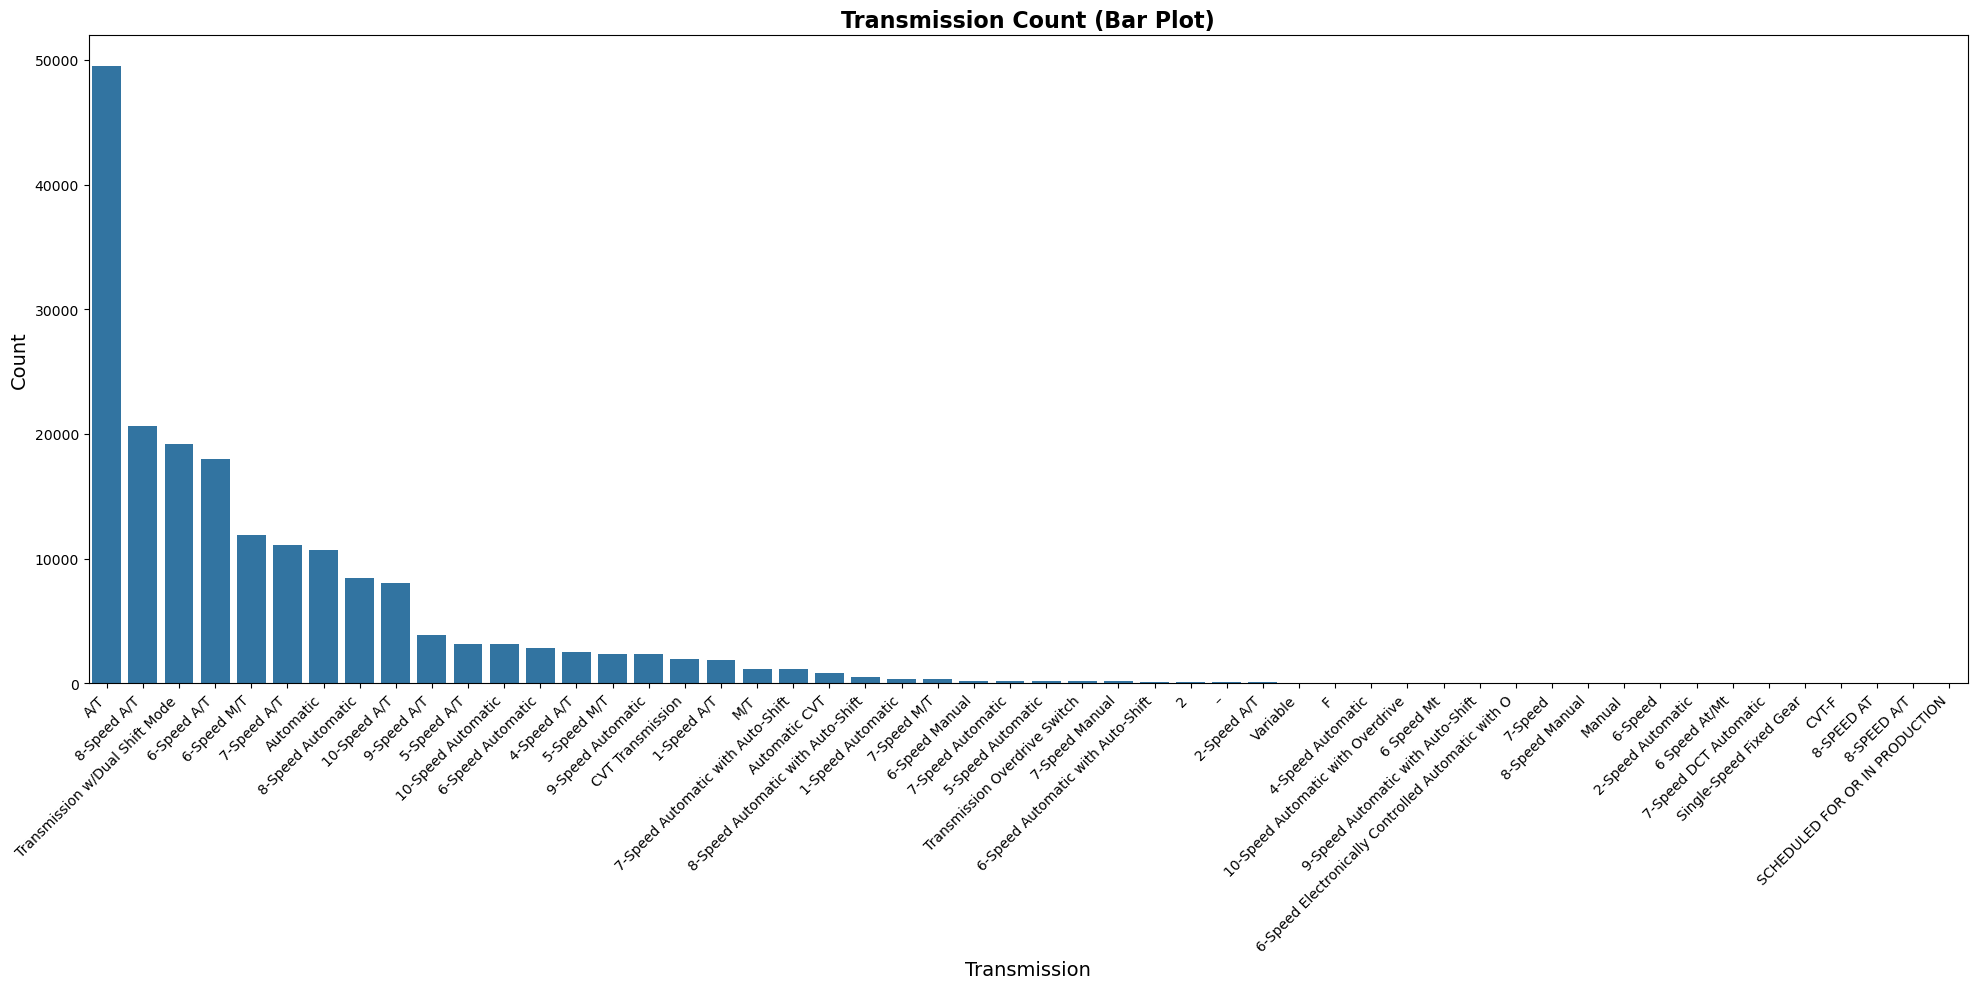

In [51]:
plt.figure(figsize=(20, 10))
sns.countplot(x='transmission', data=train_df, order=train_df['transmission'].value_counts().index)

plt.title('Transmission Count (Bar Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Transmission', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [52]:
train_df.transmission.unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [53]:
def categorize_transmission(trans_str):
    if pd.isna(trans_str):
        return 'Other'
    elif 'A/T' in trans_str or 'AT' in trans_str or 'Automatic' in trans_str or 'CVT' in trans_str:
        return 'Automatic'
    elif 'M/T' in trans_str or 'MT' in trans_str or 'Mt' in trans_str or 'Manual' in trans_str or 'Mt' in trans_str:
        return 'Manual'
    else:
        return 'Other'

train_df['transmission_type'] = train_df['transmission'].apply(categorize_transmission)
train_df['transmission_type'].value_counts()

C:\Users\BAHA ENES\AppData\Local\Temp\ipykernel_21548\3128732020.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['transmission_type'] = train_df['transmission'].apply(categorize_transmission)


transmission_type
Automatic    151643
Other         19730
Manual        16218
Name: count, dtype: int64

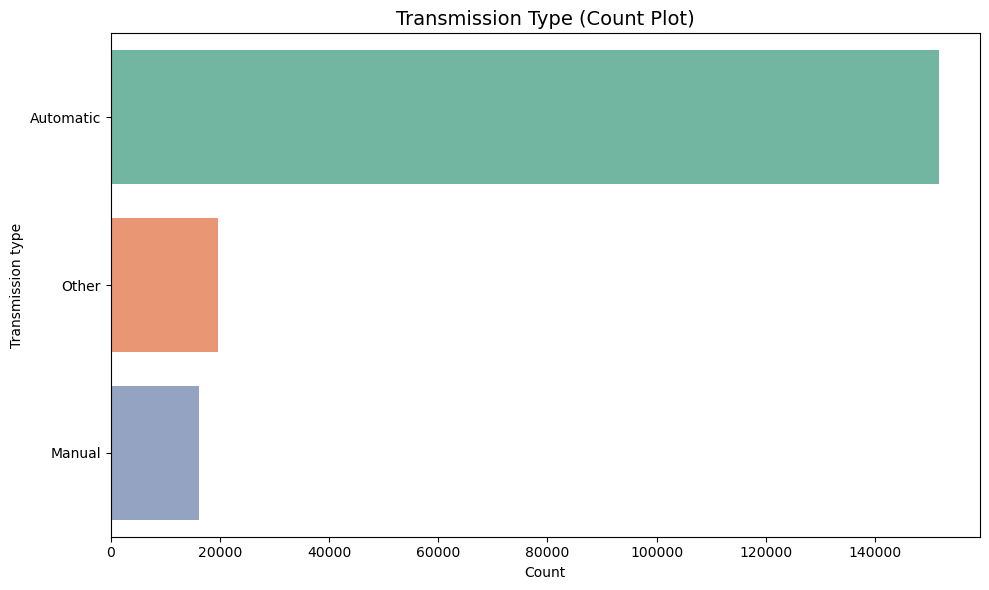

In [54]:
plt.figure(figsize=(10, 6))

sns.countplot(data=train_df, y='transmission_type', hue='transmission_type', palette='Set2')

plt.title('Transmission Type (Count Plot)', fontsize=14)
plt.ylabel('Transmission type')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

In [55]:
train_df['engine'].nunique()

1117

In [57]:
def extract_engine_size(engine_str):
    match = re.search(r'(\d+\.?\d*)\s*(L|Liter)', engine_str, re.IGNORECASE)
    if match:
        return float(match.group(1))
    return None

train_df['engine_size'] = train_df['engine'].apply(extract_engine_size)

C:\Users\BAHA ENES\AppData\Local\Temp\ipykernel_21548\3055302019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['engine_size'] = train_df['engine'].apply(extract_engine_size)


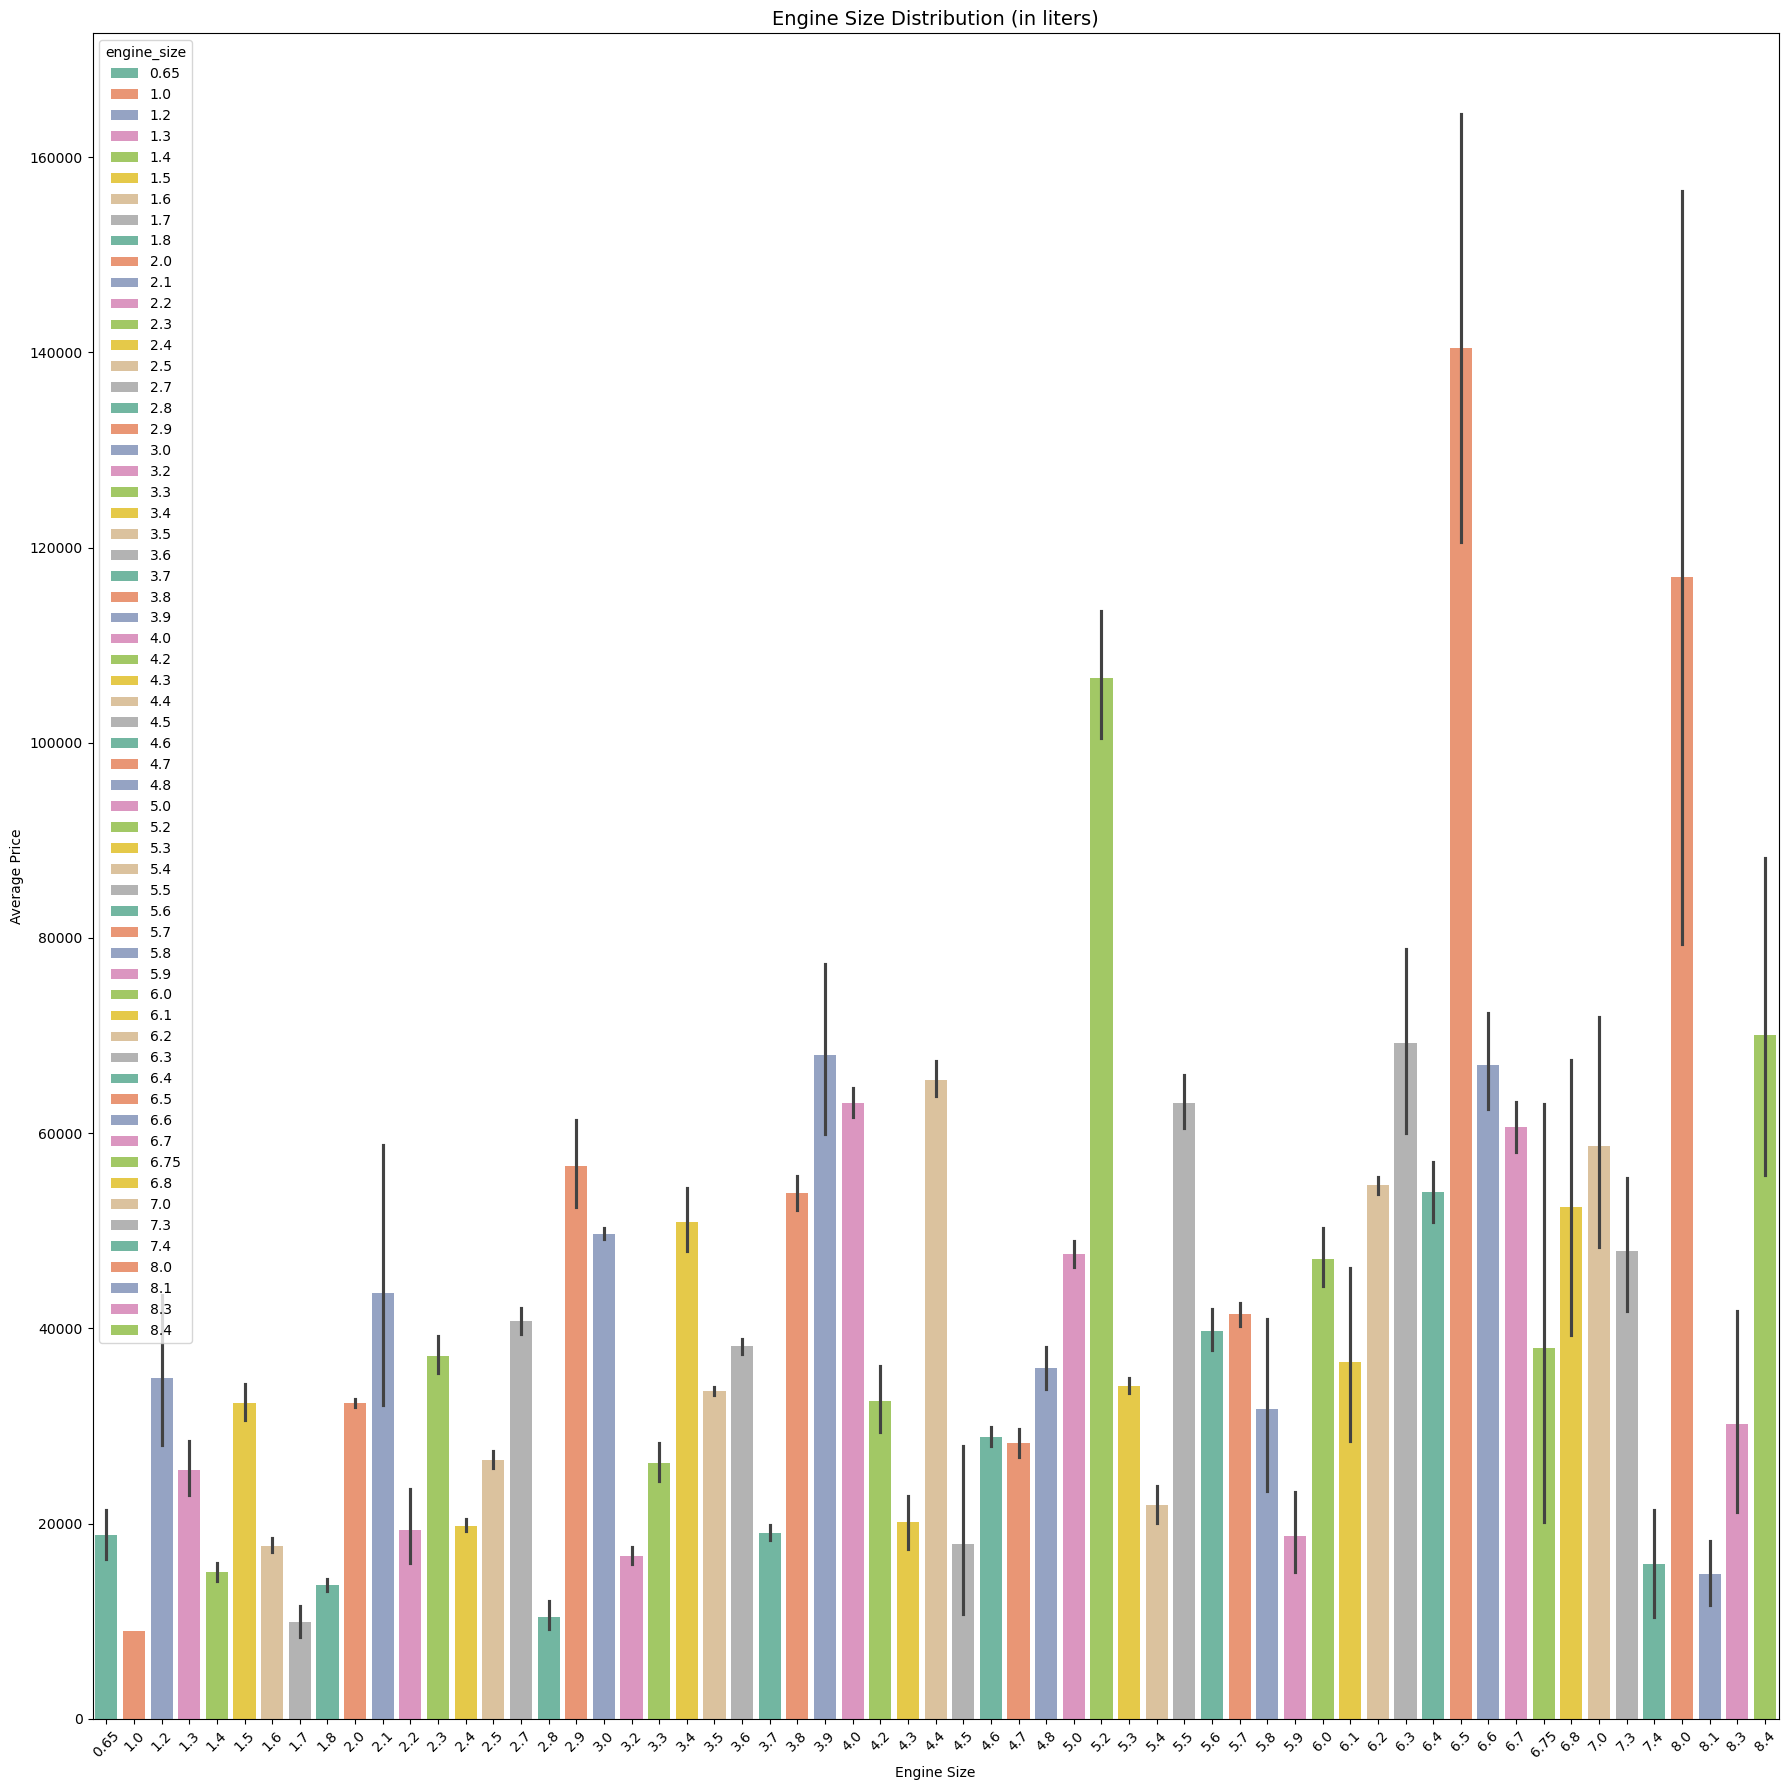

In [58]:
plt.figure(figsize=(18, 18))

sns.barplot(data=train_df, x='engine_size', y='price', hue='engine_size', estimator='mean', palette='Set2')

plt.title('Engine Size Distribution (in liters)', fontsize=14)
plt.xlabel('Engine Size')
plt.xticks(rotation = 45)
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

In [59]:
def extract_cylinder_count(engine_str):
    match_explicit = re.search(r'(\d+)\s*Cylinder', engine_str)
    if match_explicit:
        return int(match_explicit.group(1))

    match_implicit = re.search(r'V(\d+)', engine_str)
    if match_implicit:
        return int(match_implicit.group(1))
    return None

train_df['cylinder_count'] = train_df['engine'].apply(extract_cylinder_count)

C:\Users\BAHA ENES\AppData\Local\Temp\ipykernel_21548\2892662353.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cylinder_count'] = train_df['engine'].apply(extract_cylinder_count)


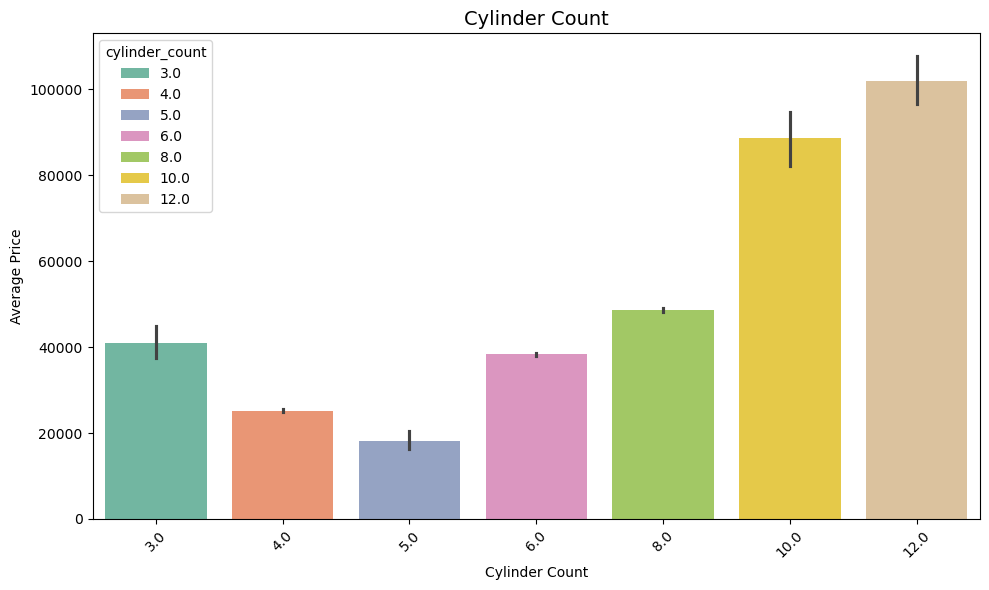

In [60]:
plt.figure(figsize=(10, 6))

sns.barplot(data=train_df, x='cylinder_count', y='price', hue='cylinder_count', estimator='mean', palette='Set2')

plt.title('Cylinder Count', fontsize=14)
plt.xlabel('Cylinder Count')
plt.xticks(rotation = 45)
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

In [61]:
train_df['car_age'] = train_df['car_age'].replace(0, 1)

train_df['milage_per_year'] = train_df['milage'] / train_df['car_age']

C:\Users\BAHA ENES\AppData\Local\Temp\ipykernel_21548\2713172592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['car_age'] = train_df['car_age'].replace(0, 1)
C:\Users\BAHA ENES\AppData\Local\Temp\ipykernel_21548\2713172592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['milage_per_year'] = train_df['milage'] / train_df['car_age']


In [62]:
train_df['milage_per_year'].max()

235000.0

In [63]:
train_df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'car_age', 'age_group', 'brand_type', 'transmission_type',
       'engine_size', 'cylinder_count', 'milage_per_year'],
      dtype='object')

In [64]:
train_df.drop(['id', 'brand', 'model', 'transmission', 'model_year', 'engine', 'clean_title', 'int_col', 'ext_col'], axis=1, inplace = True)

C:\Users\BAHA ENES\AppData\Local\Temp\ipykernel_21548\1818214281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['id', 'brand', 'model', 'transmission', 'model_year', 'engine', 'clean_title', 'int_col', 'ext_col'], axis=1, inplace = True)


In [65]:
cat_mapper = [
    # Age group values order 
    ['Old', 'Middle-aged', 'New'],
    # Brand type values order 
    ['normal', 'luxurious']
]

In [66]:
one_hot_encoder_features = ['fuel_type', 'transmission_type', 'accident']

ordinal_encoder_features = ['age_group', 'brand_type']

standard_scalar_features = ['milage',  'car_age', 'milage_per_year']

all_features = one_hot_encoder_features + ordinal_encoder_features + standard_scalar_features + ['cylinder_count', 'engine_size']

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(handle_unknown='ignore'), one_hot_encoder_features),
        ('ordinal', OrdinalEncoder(categories=cat_mapper), ordinal_encoder_features),
        ('num', StandardScaler(), standard_scalar_features)
    ],
)

In [68]:
X = train_df[all_features]
y = train_df['price']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [70]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [72]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

c:\Users\BAHA ENES\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(optimizer = 'adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [74]:
model.fit(X_train, y_train, epochs=40, validation_split = 0.2)

Epoch 1/40
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 5s 998us/step - loss: 2327239936.0000 - root_mean_squared_error: 47857.5742 - val_loss: 1688318464.0000 - val_root_mean_squared_error: 41089.1523
Epoch 2/40
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 5s 950us/step - loss: 1734218368.0000 - root_mean_squared_error: 41625.1328 - val_loss: 1673672192.0000 - val_root_mean_squared_error: 40910.5391
Epoch 3/40
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 3s 946us/step - loss: 1624736384.0000 - root_mean_squared_error: 40270.9336 - val_loss: 1670876800.0000 - val_root_mean_squared_error: 40876.3594
Epoch 4/40
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1747496704.0000 - root_mean_squared_error: 41728.6055 - val_loss: 1667345152.0000 - val_root_mean_squared_error: 40833.1367
Epoch 5/40
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1690650496.0000 - root_mean_squared_error: 41109.0469 - val_loss: 1662774784.0000 - val_root_mean_squared_error: 40777.1367
Epoch 6/40
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1

In [75]:
model.evaluate(X_test, y_test)

1466/1466 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1771388544.0000 - root_mean_squared_error: 42071.4727


[1778535168.0, 42172.68359375]

In [77]:
def process_df(df):
        
    
    # Flex
    df.loc[(df['fuel_type'].isna()) & (df['engine'].str.contains("Flex", case=False, na=False)), 'fuel_type'] = 'E85 Flex Fuel'
    
    # Hybrid
    hybrid_conditions = [
        df['engine'].str.contains("Dual", case=False, na=False),
        df['engine'].str.contains("Electric", case=False, na=False),
        df['engine'].str.contains("Battery", case=False, na=False),
        df['engine'].str.contains("kW", case=False, na=False),
        df['engine'].str.contains("AH", case=False, na=False),
        df['brand'].str.contains("Tesla", case=False, na=False),
        df['model'].str.contains("Hybrid", case=False, na=False)
    ]
    df.loc[df['fuel_type'].isna() & pd.concat(hybrid_conditions, axis=1).any(axis=1), 'fuel_type'] = 'Hybrid'
    
    # Gasoline Pattern
    gasoline_conditions = [
        df['engine'].str.contains("GDI", case=False, na=False),
        df['engine'].str.contains("PDI", case=False, na=False),
        df['engine'].str.contains("OHV", case=False, na=False),
        df['engine'].str.contains("MPFI", case=False, na=False),
        df['engine'].str.contains("TFSI", case=False, na=False),
        df['engine'].str.contains("DOHC", case=False, na=False),
        df['engine'].str.contains("Gasoline", case=False, na=False),
        df['model_year'] < 2020
    ]
    df.loc[df['fuel_type'].isna() & pd.concat(gasoline_conditions, axis=1).any(axis=1), 'fuel_type'] = 'Gasoline'
    
    # Diesel Pattern
    df.loc[(df['fuel_type'].isna()) & (df['engine'].str.contains("Diesel", case=False, na=False)), 'fuel_type'] = 'Diesel'

    df['fuel_type'] = df['fuel_type'].fillna('Hybrid')
        
    df.loc[(df['accident'] == 'At least 1 accident or damage reported') & (df['clean_title'].isna()), 'clean_title'] = 'Yes'
    df['clean_title'] = df['clean_title'].fillna('No')
    df['accident'] = df['accident'].fillna('None reported')
    
    
    df['car_age'] = current_year - df['model_year']
    df['age_group'] = df['car_age'].apply(categorize_age)
    
    
    df['car_age'] = df['car_age'].replace(0, 1)
    df['milage_per_year'] = df['milage'] / df['car_age']
    
    df['brand_type'] = df['brand'].apply(lambda x: 'luxurious' if x in luxurious_brands else 'normal')

    df['engine_size'] = df['engine'].apply(extract_engine_size)
    df['cylinder_count'] = df['engine'].apply(extract_cylinder_count)
    most_frequent_engine_size = df['engine_size'].mode()[0]
    df['engine_size'] = df['engine_size'].fillna(most_frequent_engine_size)
    df['cylinder_count'] = df['cylinder_count'].fillna(0)
    
    df['transmission_type'] = df['transmission'].apply(categorize_transmission)
    
    return df

In [78]:
processed_test = process_df(test_df) 

In [79]:
encoded_test = preprocessor.transform(processed_test[all_features])

In [80]:
y_pred = model.predict(encoded_test)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 2s 528us/step


In [81]:
y_pred = y_pred.reshape(-1,)

In [82]:
output = pd.DataFrame({'id': test_df.id, 'price': y_pred})
output.to_csv('submission.csv', index=False)